In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

house_prices_df = pd.read_csv('train.csv')
house_prices_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd

In [14]:
house_prices_df = house_prices_df.drop(house_prices_df.columns[house_prices_df.isnull().sum()*100/house_prices_df.shape[0] > 10], axis=1)
#df.isnull().sum()*100/df.shape[0]
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [15]:
# one-hot encoding of the Central Air Conditioning
house_prices_df['have_CentralAir'] = pd.get_dummies(house_prices_df.CentralAir, drop_first=True)
house_prices_df['have_CentralAir'].head(10)
# this will be used in the upcoming codes

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: have_CentralAir, dtype: uint8

In [16]:
house_prices_df['OxygenLevel'] = house_prices_df.GrLivArea * house_prices_df.have_CentralAir
house_prices_df['OxygenLevel'].head(10)

0    1710
1    1262
2    1786
3    1717
4    2198
5    1362
6    1694
7    2090
8    1774
9    1077
Name: OxygenLevel, dtype: int64

In [17]:
Y = house_prices_df['SalePrice']

X = house_prices_df[['GrLivArea', 'have_CentralAir', 'OxygenLevel']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [    52.47339915 -15304.01819051     56.10866027]

Intercept: 
 35529.13562282489


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [19]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     462.7
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          7.55e-198
Time:                        07:52:30   Log-Likelihood:                -14354.
No. Observations:                1168   AIC:                         2.872e+04
Df Residuals:                    1164   BIC:                         2.874e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.228e+04   1.53e+04      2.109      0.035    2247.866    6.23e+04
GrLivArea          55.4438     10.433      5.314      0.000      34.974      75.914
have_CentralAir -9268.9983   1.61e+04     -0.576      0.565   -4.08e+04    2.23e+04
OxygenLevel        50.2143     10.870      4.619      0.000      28.887      71.541
==============================================================================
Omnibus:                      206.464   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3973.648
Skew:                           0.132   Prob(JB):                         0.00
Kurtosis:                      12.032   Cond. No.                     3.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

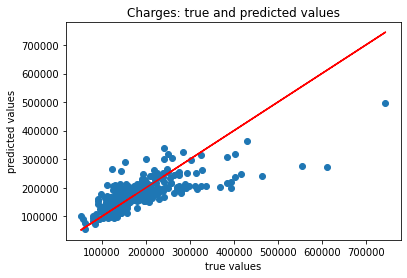

Mean absolute error of the prediction is: 36384.666325231825
Mean squared error of the prediction is: 3271827958.8492384
Root mean squared error of the prediction is: 57199.89474508881
Mean absolute percentage error of the prediction is: 19.09863506892835


In [20]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [21]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We fit an OLS model using statsmodels
results_test = sm.OLS(y_test, X_test).fit()

# We print the summary results
display(results_test.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     126.1
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.68e-52
Time:                        07:52:35   Log-Likelihood:                -3606.6
No. Observations:                 292   AIC:                             7221.
Df Residuals:                     288   BIC:                             7236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.202e+04   3.99e+04      1.555      0.121   -1.65e+04    1.41e+05
GrLivArea          28.0045     30.550      0.917      0.360     -32.125      88.134
have_CentralAir -5.496e+04   4.13e+04     -1.332      0.184   -1.36e+05    2.63e+04
OxygenLevel        93.8956     31.270      3.003      0.003      32.348     155.443
==============================================================================
Omnibus:                      103.990   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.780
Skew:                           1.376   Prob(JB):                    1.50e-115
Kurtosis:                       8.991   Cond. No.                     3.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By looking at the R-squared values and AIC&BIC values, it seems that the test set has done better than the train set. It is something that we would not want.

# Trying to improve the model

In [41]:
house_prices_df['GarageYrBlt'].fillna((house_prices_df['GarageYrBlt'].mean()), inplace=True)

house_prices_df['HigherTheBetter'] = house_prices_df['BsmtFinSF2'] * house_prices_df['BsmtFinSF1']
house_prices_df['GaragesInGeneral'] = house_prices_df['GarageCars'] * house_prices_df['GarageYrBlt'] 

X = house_prices_df[['have_CentralAir', 'GaragesInGeneral', 'HigherTheBetter', 'OxygenLevel']]

Y = house_prices_df['SalePrice']

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-7.46325964e+04  2.01879127e+01  5.26060753e-02  8.21535260e+01]

Intercept: 
 61651.60227819202


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [43]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     561.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          1.01e-269
Time:                        08:05:33   Log-Likelihood:                -14185.
No. Observations:                1168   AIC:                         2.838e+04
Df Residuals:                    1163   BIC:                         2.840e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.858e+04   5671.648     10.328      0.000    4.75e+04    6.97e+04
have_CentralAir  -7.043e+04   6748.588    -10.436      0.000   -8.37e+04   -5.72e+04
GaragesInGeneral    21.1187      1.021     20.684      0.000      19.115      23.122
HigherTheBetter      0.0334      0.021      1.601      0.110      -0.008       0.074
OxygenLevel         78.6488      2.945     26.710      0.000      72.872      84.426
==============================================================================
Omnibus:                      220.664   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3672.825
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                      11.659   Cond. No.                     4.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

WHOA! The R-squared values increased very well. However, AIC&BIC values are increased.

# Overfitting and Regularization

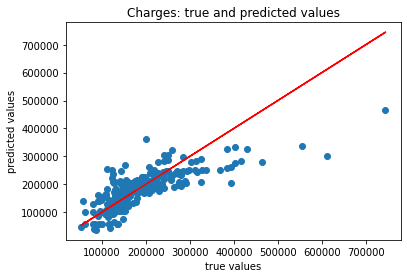

Mean absolute error of the prediction is: 34705.98982126928
Mean squared error of the prediction is: 2844167646.0713115
Root mean squared error of the prediction is: 53330.7382854514
Mean absolute percentage error of the prediction is: 19.80214459868456


In [44]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [48]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.00000000e+00 -7.04271283e+04  2.11186946e+01  3.33833245e-02
  7.86488209e+01]

Intercept: 
 58578.508939881634


In [49]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [50]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.658831868632167
-----Test set statistics-----
R-squared of the model in test set is: 0.6074501504037619
Mean absolute error of the prediction is: 34705.989821273106
Mean squared error of the prediction is: 2844167646.067571
Root mean squared error of the prediction is: 53330.73828541633
Mean absolute percentage error of the prediction is: 19.802144598692976


This model looks pretty good in terms of the comparison btwn the R-squared values of the training set and the train set.

# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0019389852335491842
Mean absolute error of the prediction is: 58947.449052355034
Mean squared error of the prediction is: 7259415455.301054
Root mean squared error of the prediction is: 85202.20334768963
Mean absolute percentage error of the prediction is: 35.307207929644804


Why do I think that this regression messed up my model? My training set's R-squared is 0 and test set's is negative. The same is happening in the upcoming regression methods as well.

# Lasso Regression

In [52]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0019389852335491842
Mean absolute error of the prediction is: 58947.449052355034
Mean squared error of the prediction is: 7259415455.301054
Root mean squared error of the prediction is: 85202.20334768963
Mean absolute percentage error of the prediction is: 35.307207929644804


# ElasticNet regression

In [53]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0019389852335491842
Mean absolute error of the prediction is: 58947.449052355034
Mean squared error of the prediction is: 7259415455.301054
Root mean squared error of the prediction is: 85202.20334768963
Mean absolute percentage error of the prediction is: 35.307207929644804
